## 2. Write a program to decompose the time series into trend, seasonal, and residual components.

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('daily_min_temp.csv')
data

,Date,Temp
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


In [17]:
# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index 
data.set_index('Date', inplace=True)

print(data.head())

        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8
            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


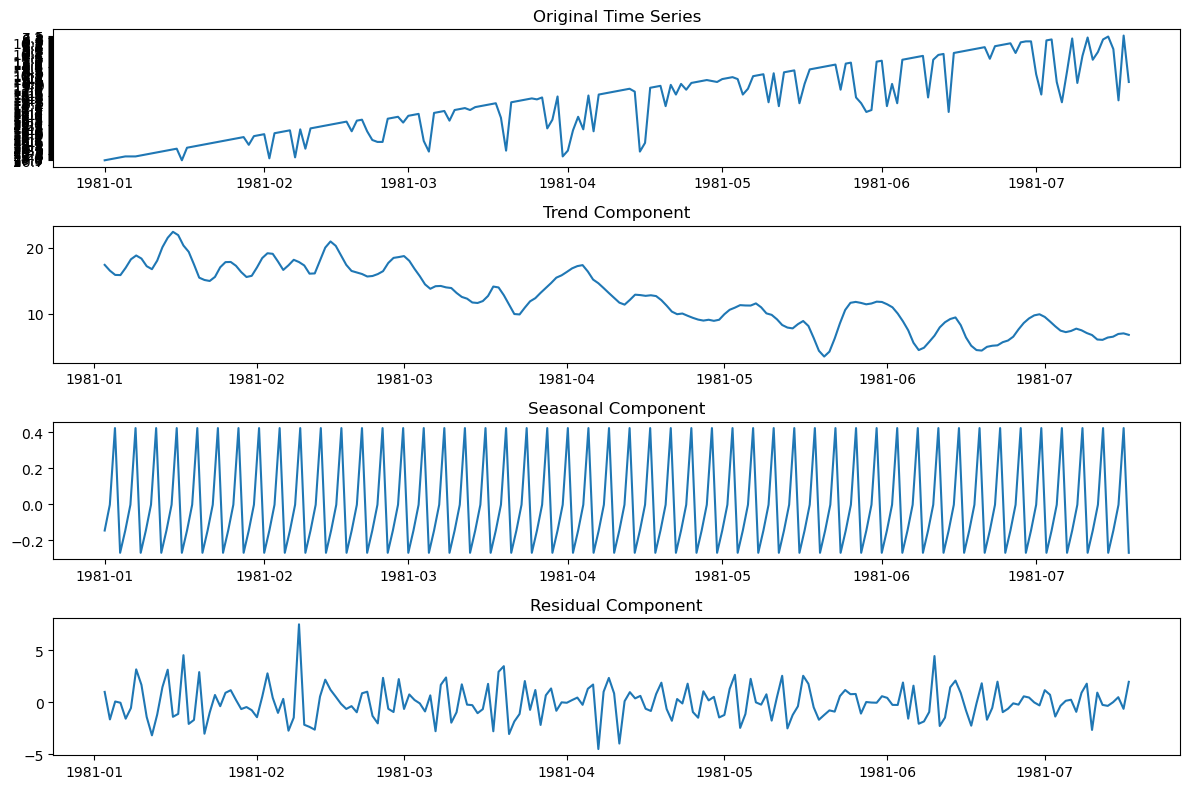

In [13]:
# selecting only first 200 rows
data = data.iloc[:200]

# seasonal decomposition
result = sm.tsa.seasonal_decompose(data['Temp'], model='additive',period=4)

# Extracting the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot
plt.figure(figsize=(12, 8))

plt.subplot(411)  # Original time series
plt.plot(data['Temp'])
plt.title('Original Time Series')

plt.subplot(412)  # Trend component
plt.plot(trend)
plt.title('Trend Component')

plt.subplot(413)  # Seasonal component
plt.plot(seasonal)
plt.title('Seasonal Component')

plt.subplot(414)  # Residual component
plt.plot(residual)
plt.title('Residual Component')

plt.tight_layout()

# Show the plots
plt.show()
